# Exercise 4.2 | Model Residuals

Diagnosing the fit of the model.

In [1]:
# Imports
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# File Path
file_path = 'https://tayweid.github.io/econ-0150/parts/part-4-1/data/'

## Exploratory Data Analysis

In [4]:
# Load
data = pd.read_csv(file_path + 'Life_Evaluation_GDP_PerCap.csv')
# Log Transformation
data['log_GDP_PerCap'] = np.log10(data['GDP_Per_Cap'])
# Filter: 2024
data = data[data['Year'] == 2024]
# Show
data.head()

,Year,Country,Life_Evaluation,GDP_Per_Cap,log_GDP_PerCap
0,2024,Afghanistan,1.364,549.27,2.739786
13,2024,Albania,5.411,5411.94,3.733353
26,2024,Algeria,5.571,4361.21,3.639607
45,2024,Argentina,6.397,11107.35,4.045610
58,2024,Armenia,5.494,5016.99,3.700443


<Axes: xlabel='GDP_Per_Cap', ylabel='Life_Evaluation'>

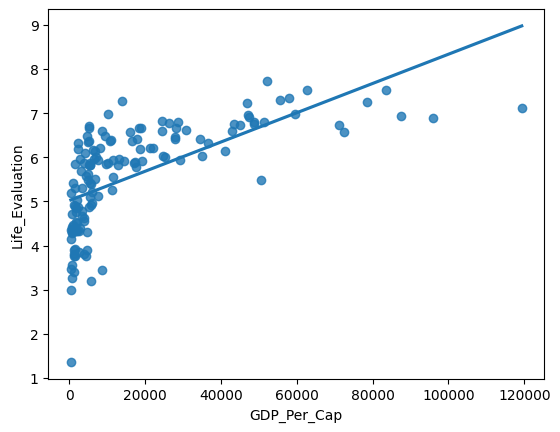

In [23]:
# Visualize: Numerical x Numerical
sns.regplot(y='Life_Evaluation', x='GDP_Per_Cap', data=data, ci=None)

## General Linear Model

In [31]:
# Model: y = b + mx
model = smf.ols('Life_Evaluation ~ log_GDP_PerCap', data).fit() # Intercept is included by default
print(model.summary().tables[1])

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.2502      0.364     -0.687      0.493      -0.970       0.469
log_GDP_PerCap     1.5145      0.093     16.225      0.000       1.330       1.699


In [16]:
# Fit the model with robust standard errors (HC3: heteroskedastic-constant)
robust_model = smf.ols('Life_Evaluation ~ log_GDP_PerCap', data=data).fit(cov_type='HC3')
print(robust_model.summary().tables[1])

                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.2502      0.381     -0.657      0.511      -0.996       0.496
log_GDP_PerCap     1.5145      0.091     16.560      0.000       1.335       1.694


## Residuals

<Axes: ylabel='Count'>

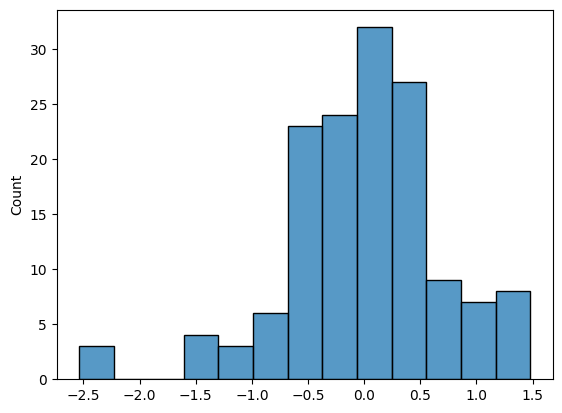

In [32]:
residuals = model.resid
sns.histplot(residuals)

<Axes: ylabel='Count'>

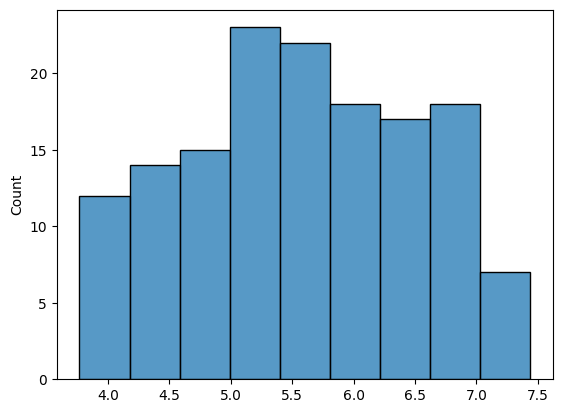

In [12]:
predictions = model.predict()
sns.histplot(predictions)

## Residual Plot

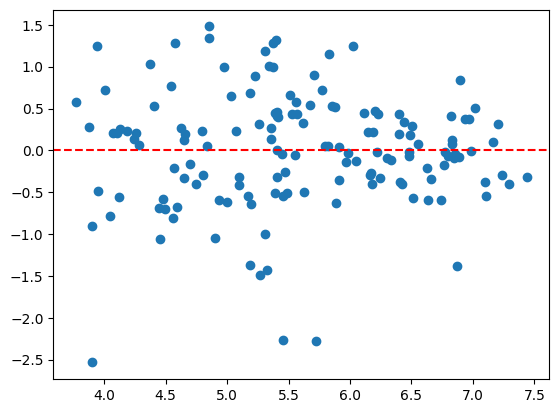

In [30]:
plt.scatter(predictions, residuals)
# horizontal line
plt.axhline(y=0, color='r', linestyle='--')
#